In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/My Drive/Year 4/Data Mining/Mini Project/')
!pwd

/content/gdrive/My Drive/Year 4/Data Mining/Mini Project


In [4]:
!ls

 computed_insight_success_of_active_sellers.csv
'Data Cleaning + EDA - Project .ipynb'
 resources
 summer-products-with-rating-and-performance_2020-08.csv
 summer-sales-clothes_cleaned.csv


In [5]:
# Import neccesary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset
data = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
# Print summary information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
# Show all attributes
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
# Check for null values
data.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

#### Deal with missing values

* Fill number of ratings by 0 if the value is None.

In [ ]:
# Fill number of ratings by 0 if the value is None
data['rating_five_count'] = data['rating_five_count'].replace(np.nan, 0)
data['rating_four_count'] = data['rating_four_count'].replace(np.nan, 0)
data['rating_three_count'] = data['rating_three_count'].replace(np.nan, 0)
data['rating_two_count'] = data['rating_two_count'].replace(np.nan, 0)
data['rating_one_count'] = data['rating_one_count'].replace(np.nan, 0)

In [ ]:
# Many categories for product color --> need to standardize
data['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [ ]:
# # Standardize segmented product_color into actual color
# data['product_color'] = data['product_color'].replace('White', 'white')
# data['product_color'] = data['product_color'].replace('offwhite', 'white')
# data['product_color'] = data['product_color'].replace('whitestripe', 'white')
# data['product_color'] = data['product_color'].replace('Black', 'black')
# data['product_color'] = data['product_color'].replace('coolblack', 'black')
# data['product_color'] = data['product_color'].replace('black & stripe', 'black')
# data['product_color'] = data['product_color'].replace('offblack', 'black')

# # Convert to blue color
# data['product_color'] = data['product_color'].replace('Blue', 'blue')
# data['product_color'] = data['product_color'].replace('navyblue', 'blue')
# data['product_color'] = data['product_color'].replace('lightblue', 'blue')
# data['product_color'] = data['product_color'].replace('skyblue', 'blue')
# data['product_color'] = data['product_color'].replace('darkblue', 'blue')
# data['product_color'] = data['product_color'].replace('navy', 'blue')
# data['product_color'] = data['product_color'].replace('lakeblue', 'blue')
# data['product_color'] = data['product_color'].replace('purple', 'blue')
# data['product_color'] = data['product_color'].replace('navy blue', 'blue')
# data['product_color'] = data['product_color'].replace('denimblue', 'blue')
# data['product_color'] = data['product_color'].replace('prussianblue', 'blue')

# # Convert to red color
# data['product_color'] = data['product_color'].replace('RED', 'red')
# data['product_color'] = data['product_color'].replace('winered', 'red')
# data['product_color'] = data['product_color'].replace('rosered', 'red')
# data['product_color'] = data['product_color'].replace('rose', 'red')
# data['product_color'] = data['product_color'].replace('orange-red', 'red')
# data['product_color'] = data['product_color'].replace('burgundy', 'red')
# data['product_color'] = data['product_color'].replace('lightred', 'red')
# data['product_color'] = data['product_color'].replace('coralred', 'red')
# data['product_color'] = data['product_color'].replace('wine', 'red')
# data['product_color'] = data['product_color'].replace('wine red', 'red')
# data['product_color'] = data['product_color'].replace('watermelonred', 'red')
# data['product_color'] = data['product_color'].replace('claret', 'red')
# data['product_color'] = data['product_color'].replace('Rose red', 'red')

# # Convert to pink color
# data['product_color'] = data['product_color'].replace('lightpink', 'pink')
# data['product_color'] = data['product_color'].replace('beige', 'pink')
# data['product_color'] = data['product_color'].replace('camel', 'pink')
# data['product_color'] = data['product_color'].replace('apricot', 'pink')
# data['product_color'] = data['product_color'].replace('Pink', 'pink')
# data['product_color'] = data['product_color'].replace('dustypink', 'pink')

# # Convert to green color
# data['product_color'] = data['product_color'].replace('armygreen', 'green')
# data['product_color'] = data['product_color'].replace('army green', 'green')
# data['product_color'] = data['product_color'].replace('Army green', 'green')
# data['product_color'] = data['product_color'].replace('lightgreen', 'green')
# data['product_color'] = data['product_color'].replace('fluorescentgreen', 'green')
# data['product_color'] = data['product_color'].replace('mintgreen', 'green')
# data['product_color'] = data['product_color'].replace('khaki', 'green')
# data['product_color'] = data['product_color'].replace('applegreen', 'green')
# data['product_color'] = data['product_color'].replace('light green', 'green')
# data['product_color'] = data['product_color'].replace('darkgreen', 'green')

In [ ]:
# # Convert to grey color
# data['product_color'] = data['product_color'].replace('gray', 'grey')
# data['product_color'] = data['product_color'].replace('silver', 'grey')
# data['product_color'] = data['product_color'].replace('lightgray', 'grey')
# data['product_color'] = data['product_color'].replace('lightgrey', 'grey')

# # Convert to yellow, brown, beige color
# data['product_color'] = data['product_color'].replace('lightyellow', 'yellow')
# data['product_color'] = data['product_color'].replace('coffee', 'brown')
# data['product_color'] = data['product_color'].replace('tan', 'beige')
# data['product_color'] = data['product_color'].replace('nude', 'beige')

# # Convert to pair of colors
# data['product_color'] = data['product_color'].replace('white & green', 'dual')
# data['product_color'] = data['product_color'].replace('black & green', 'dual')
# data['product_color'] = data['product_color'].replace('black & white', 'dual')
# data['product_color'] = data['product_color'].replace('pink & grey', 'dual')
# data['product_color'] = data['product_color'].replace('pink & white', 'dual')
# data['product_color'] = data['product_color'].replace('black & blue', 'dual')
# data['product_color'] = data['product_color'].replace('white & black', 'dual')
# data['product_color'] = data['product_color'].replace('black & yellow', 'dual')
# data['product_color'] = data['product_color'].replace('pink & blue', 'dual')
# data['product_color'] = data['product_color'].replace('pink & black', 'dual')
# data['product_color'] = data['product_color'].replace('blackwhite', 'dual')
# data['product_color'] = data['product_color'].replace('red & blue', 'dual')
# data['product_color'] = data['product_color'].replace('blue & pink', 'dual')
# data['product_color'] = data['product_color'].replace('orange & camouflage', 'dual')
# data['product_color'] = data['product_color'].replace('red & blue', 'dual')

# data['product_color'] = data['product_color'].replace('gray & white', 'dual')
# data['product_color'] = data['product_color'].replace('brown & yellow', 'dual')
# data['product_color'] = data['product_color'].replace('winered & yellow', 'dual')
# data['product_color'] = data['product_color'].replace('navyblue & white', 'dual')

# data['product_color'] = data['product_color'].replace('white & red', 'dual')
# data['product_color'] = data['product_color'].replace('winered & yellow', 'dual')
# data['product_color'] = data['product_color'].replace('navyblue & white', 'dual')

# # Other class
# data['product_color'] = data['product_color'].replace('multicolor', 'other')
# data['product_color'] = data['product_color'].replace('floral', 'other')
# data['product_color'] = data['product_color'].replace('whitefloral', 'other')
# data['product_color'] = data['product_color'].replace('leopard', 'other')
# data['product_color'] = data['product_color'].replace('camouflage', 'other')
# data['product_color'] = data['product_color'].replace('rainbow', 'other')
# data['product_color'] = data['product_color'].replace(np.nan, 'other')
# data['product_color'] = data['product_color'].replace('star', 'other')
# data['product_color'] = data['product_color'].replace('army', 'other')

# data['product_color'] = data['product_color'].replace('greysnakeskinprint', 'other')
# data['product_color'] = data['product_color'].replace('star', 'other')
# data['product_color'] = data['product_color'].replace('army', 'other')
# data['product_color'] = data['product_color'].replace('ivory', 'other')
# data['product_color'] = data['product_color'].replace('jasper', 'other')
# data['product_color'] = data['product_color'].replace('lightkhaki', 'other')
# data['product_color'] = data['product_color'].replace('rosegold', 'other')
# data['product_color'] = data['product_color'].replace('gold', 'other')
# data['product_color'] = data['product_color'].replace('leopardprint', 'other')

# data['product_color'] = data['product_color'].replace('violet', 'purple')
# data['product_color'] = data['product_color'].replace('lightpurple', 'purple')

In [ ]:
def standardize_color(color):
    if isinstance(color, str):
        color = color.lower()
        if color in ['white', 'offwhite', 'whitestripe']:
            return 'white'
        elif color in ['black', 'coolblack', 'black & stripe', 'offblack']:
            return 'black'
        elif color in ['blue', 'navyblue', 'lightblue', 'skyblue', 'darkblue', 'navy', 'lakeblue', 'purple', 'navy blue', 'denimblue', 'prussianblue']:
            return 'blue'
        elif color in ['red', 'winered', 'rosered', 'rose', 'orange-red', 'burgundy', 'lightred', 'coralred', 'wine', 'wine red', 'watermelonred', 'claret', 'rose red']:
            return 'red'
        elif color in ['pink', 'lightpink', 'beige', 'camel', 'apricot', 'dustypink']:
            return 'pink'
        elif color in ['green', 'armygreen', 'army green', 'lightgreen', 'fluorescentgreen', 'mintgreen', 'khaki', 'applegreen', 'light green', 'darkgreen']:
            return 'green'
        elif color in ['grey', 'gray', 'silver', 'lightgray', 'lightgrey']:
            return 'grey'
        elif color in ['yellow', 'lightyellow']:
            return 'yellow'
        elif color in ['brown', 'coffee']:
            return 'brown'
        elif color in ['beige', 'nude']:
            return 'beige'
        elif color in ['white & green', 'black & green', 'black & white', 'pink & grey', 'pink & white', 'black & blue', 'white & black', 'black & yellow', 'pink & blue', 'pink & black', 'blackwhite', 'red & blue', 'blue & pink', 'orange & camouflage', 'red & blue', 'gray & white', 'brown & yellow', 'winered & yellow', 'navyblue & white', 'white & red']:
            return 'dual'
        else:
            return 'other'
    else:
        return 'other' if np.isnan(color) else 'other'  # Handle NaN values

# Apply the function to the 'product_color' column
data['product_color'] = data['product_color'].apply(standardize_color)

# Handle NaN values
data['product_color'] = data['product_color'].fillna('other')

In [ ]:
data['product_color'].unique()

array(['white', 'green', 'other', 'black', 'yellow', 'blue', 'pink',
       'grey', 'red', 'dual', 'brown', 'beige'], dtype=object)

<ipython-input-63-488c86c72486>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_color', data=data, palette='viridis')


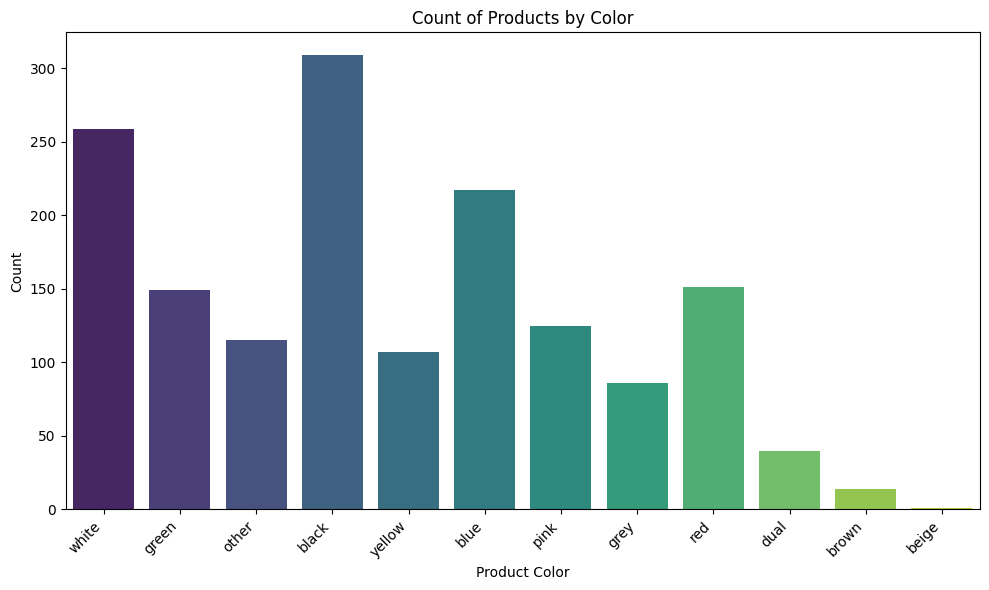

In [ ]:
# Plot the distribution of product color
plt.figure(figsize=(10, 6))
sns.countplot(x='product_color', data=data, palette='viridis')
plt.title('Count of Products by Color')
plt.xlabel('Product Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data['product_variation_size_id'].value_counts()

product_variation_size_id
S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
6XL                      1
AU plug Low quality      1
XXXL                     1
25-S                     1
SIZE S                   1
Name: count, Length: 106, dtype: int64

In [ ]:
# Standardize data in product_variation_size
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('s', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('size S', 'S')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('XS.', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size -XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE-XXS', 'XXS')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('M.', 'M')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size M', 'M')

data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size4XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SizeL', 'L')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('5XL', 'XXXXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('4XL', 'XXXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('3XL', 'XXXL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('2XL', 'XXL')

In [ ]:
def standardize_product_size(name):
    valid_sizes = ['S', 'XS', 'XXS', 'XXXS', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXXXL', 'XXXXXL']
    return name if name in valid_sizes else 'OTHER'

In [ ]:
data['product_variation_size_id'] = data['product_variation_size_id'].replace(np.nan,'OTHER')
data['product_variation_size_id'] = data['product_variation_size_id'].apply(standardize_product_size)

In [ ]:
data['product_variation_size_id'].value_counts()

product_variation_size_id
S         672
XS        363
M         205
OTHER     106
XXS       100
L          52
XXL        19
XL         19
XXXXL       7
XXXS        6
XXXXXL      4
XXXL        3
Name: count, dtype: int64

<ipython-input-100-74916df49c12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_variation_size_id', data=data, order = data['product_variation_size_id'].value_counts().index, palette='rainbow')


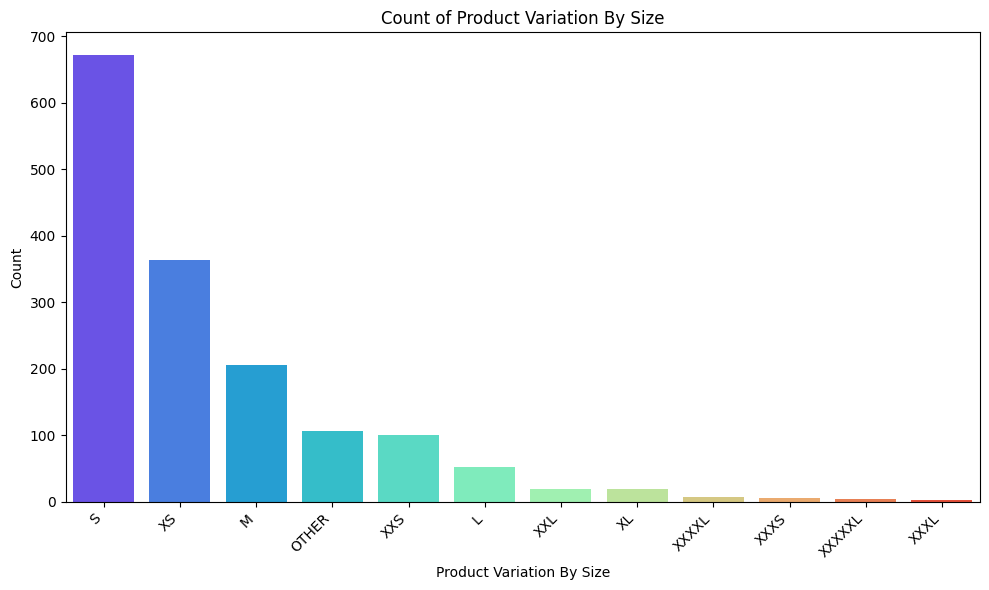

In [ ]:
# Plot the distribution of product color
plt.figure(figsize=(10, 6))
sns.countplot(x='product_variation_size_id', data=data, order = data['product_variation_size_id'].value_counts().index, palette='rainbow')
plt.title('Count of Product Variation By Size')
plt.xlabel('Product Variation By Size')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Drop unnecessary attributes
data = data.drop(columns = ['title', 'currency_buyer', 'product_id', 'tags', 'shipping_option_name', 'shipping_is_express', 'merchant_title', 'merchant_name', 'merchant_info_subtitle','urgency_text', 'has_urgency_banner',
                     'merchant_rating_count', 'merchant_id', 'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_picture', 'theme', 'crawl_month', 'origin_country'])

In [ ]:
data.isnull().sum()

title_orig                     0
price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_price          0
countries_shipped_to           0
inventory_total                0
origin_country                 0
merchant_rating                0
dtype: int64

In [ ]:
# Show the last 5 records after cleaning
data.tail()

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,10000,1,4.08,1367,722.0,293.0,185.0,...,0,0,blue,S,50,2,41,50,CN,4.224605
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,100,1,3.07,28,11.0,3.0,1.0,...,0,0,blue,S,2,1,26,50,CN,3.696054
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,100,0,3.71,59,24.0,15.0,8.0,...,0,0,white,OTHER,15,2,11,50,CN,3.961905
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,100,0,2.50,2,0.0,1.0,0.0,...,0,0,white,S,36,3,29,50,CN,3.774194
1572,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,100,1,4.07,14,8.0,3.0,1.0,...,0,0,red,S,50,2,41,50,CN,4.235939


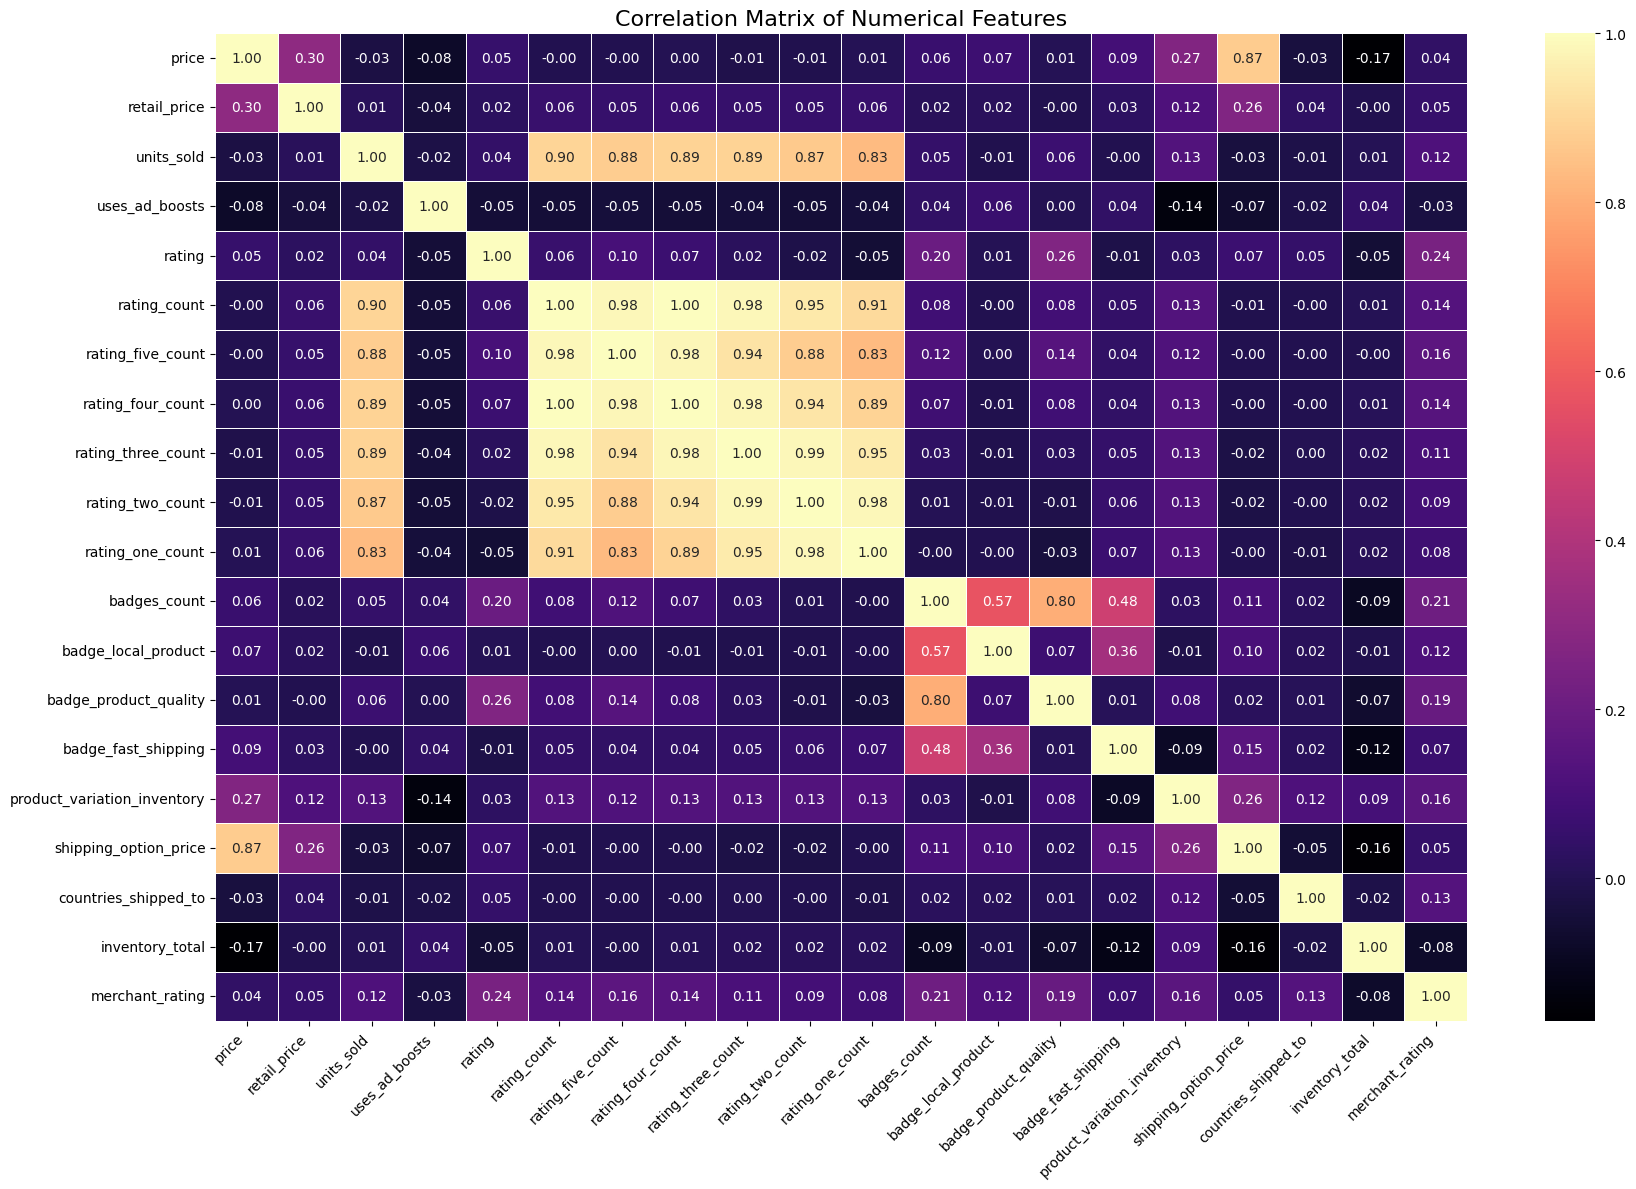

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data.to_csv("summer-sales-clothes_cleaned.csv")

In [25]:
df = pd.read_csv("summer-sales-clothes_cleaned.csv")
df.head()

,Unnamed: 0,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,0,0,white,M,50,4,34,50,CN,4.128521
1,1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,0,0,green,XS,50,2,41,50,CN,3.899673
2,2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,0,0,other,XS,1,3,36,50,CN,3.989831
3,3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,0,0,black,M,50,2,41,50,CN,4.020435
4,4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,0,0,yellow,S,1,1,35,50,CN,4.001588


In [26]:
df = df.drop(columns = ['title_orig'])

In [27]:
df = df.rename(columns={'Unnamed: 0': 'No.'})
df.head()

,No.,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
0,0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,0,0,white,M,50,4,34,50,CN,4.128521
1,1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,0,0,green,XS,50,2,41,50,CN,3.899673
2,2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,0,0,other,XS,1,3,36,50,CN,3.989831
3,3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,0,0,black,M,50,2,41,50,CN,4.020435
4,4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,0,0,yellow,S,1,1,35,50,CN,4.001588


In [30]:
df.to_csv("sales_clothes.csv", index=False)

In [11]:
# Data Normalization of ratings
def normalize_rating(rate, counts) :
    if rate == 0:
        return 0
    else :
        return rate/counts

In [12]:
df['rating_one_count'] = df.apply(lambda x: normalize_rating(x.rating_one_count, x.rating_count), axis=1)
df['rating_two_count'] = df.apply(lambda x: normalize_rating(x.rating_two_count, x.rating_count), axis=1)
df['rating_three_count'] = df.apply(lambda x: normalize_rating(x.rating_three_count, x.rating_count), axis=1)
df['rating_four_count'] = df.apply(lambda x: normalize_rating(x.rating_four_count, x.rating_count), axis=1)
df['rating_five_count'] = df.apply(lambda x: normalize_rating(x.rating_five_count, x.rating_count), axis=1)

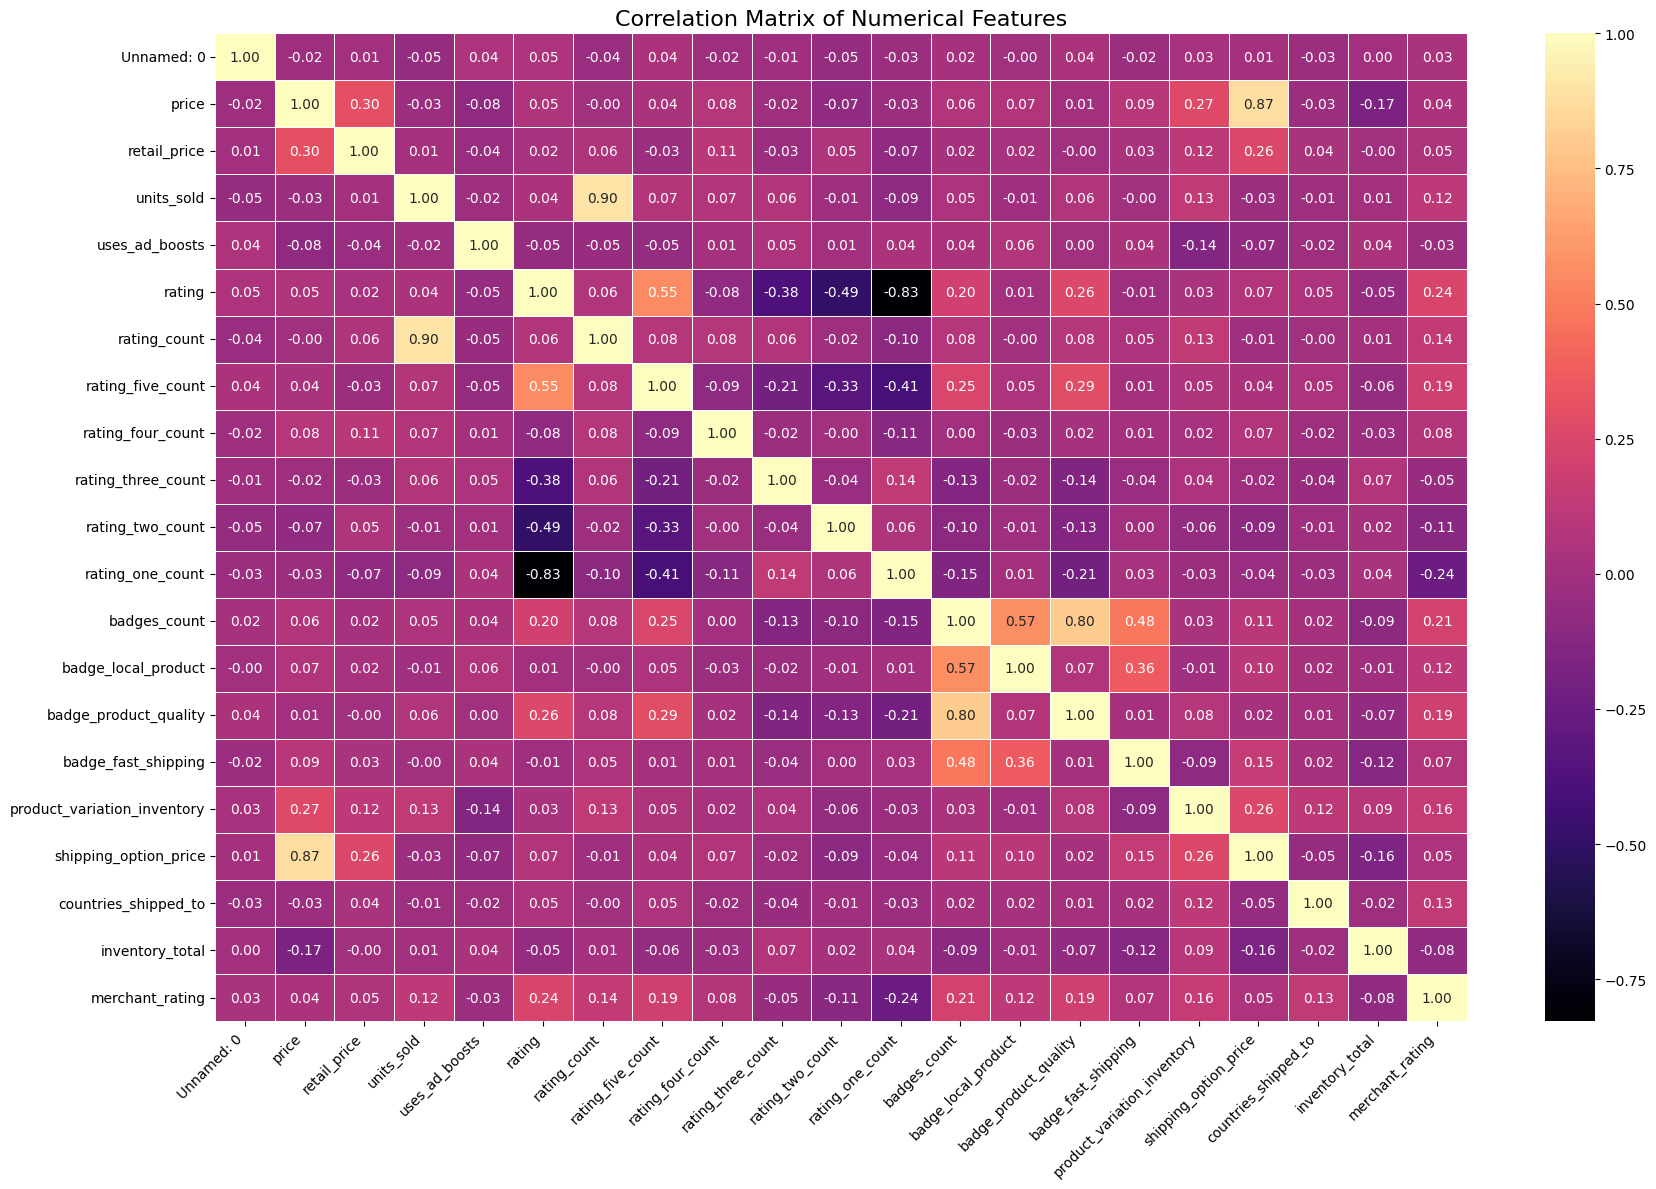

In [14]:
# Select only numerical columns
numerical_data = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-17-5ee8ed19cda7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='units_sold', data=df, order = df['units_sold'].value_counts().index, palette='rainbow')


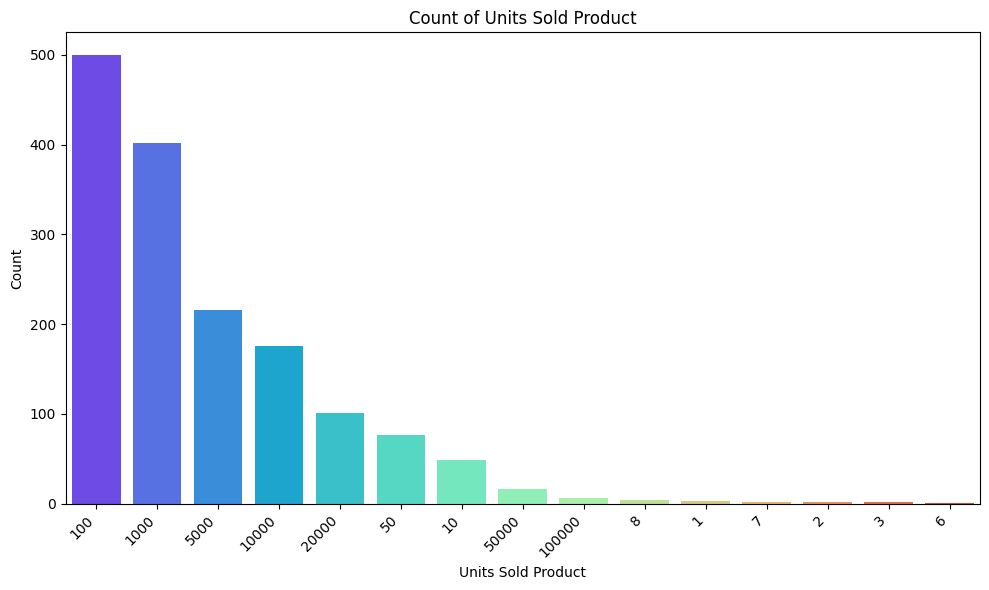

In [17]:
# Plot the distribution of product color
plt.figure(figsize=(10, 6))
sns.countplot(x='units_sold', data=df, order = df['units_sold'].value_counts().index, palette='rainbow')
plt.title('Count of Units Sold Product')
plt.xlabel('Units Sold Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.utils import resample

# Downsample minority class
downsampled_data = resample(df,replace=False, n_samples=200, random_state=42)
downsampled_data.shape

(200, 25)

In [19]:
downsampled_data.head()

,Unnamed: 0,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
1496,1513,Sexy Women's Summer Casual Sleeveless Evening ...,13.0,11,100,0,3.22,9,0.555556,0.000000,...,0,0,green,L,50,3,41,50,CN,3.801802
168,169,Women Summer Off Sholuder V-Neck Printed Big S...,7.0,6,5000,0,3.29,1042,0.368522,0.140115,...,0,0,grey,S,4,2,46,50,CN,3.870809
353,355,Women Fashion's Lace Sexy Elastic Yoga Shorts ...,8.0,75,50,0,4.33,3,0.333333,0.666667,...,0,0,black,S,50,3,41,50,CN,4.002933
468,470,Women Fashion Off-shoulder Tank Top Casual Blo...,6.0,38,5000,0,4.22,958,0.596033,0.178497,...,0,0,black,M,50,2,40,50,CN,4.293900
1410,1427,NEW Womens Plus Size Top Summer Deep V-neck To...,8.0,7,1000,1,3.41,64,0.296875,0.203125,...,0,0,pink,S,1,3,36,50,CN,3.475584


In [20]:
downsampled_data.to_csv("200-samples_data.csv")

In [ ]:
data['production_price'] = data['price'] * data['units_sold']
data['selling'] = data['retail_price'] * data['units_sold']

In [ ]:
data['revenue'] = data['selling'] - data['production_price']

In [ ]:
total_revenue = data['revenue'].sum()
print("The total revenue:", '$'+str(total_revenue))

The total revenue: $109206393.85
